# Exploratory Data Analysis (EDA)

## What I Did
- Analyzed revenue and sales trends
- Studied customer purchasing behavior
- Evaluated product and category performance
- Explored session engagement patterns


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

In [3]:
logging.basicConfig(level=logging.INFO)

In [4]:
def data_load():
    customer=pd.read_csv("Documents/ML_Competetion/Python Project/Sales project 1/cleaned_customer.csv",parse_dates=["first_join_date"])
    product=pd.read_csv("Documents/ML_Competetion/Python Project/Sales project 1/cleaned_product.csv")
    trans=pd.read_csv("Documents/ML_Competetion/Python Project/Sales project 1/cleaned_transactions.csv",parse_dates=["created_at","shipment_date_limit"])
    click=pd.read_csv("Documents/ML_Competetion/Python Project/Sales project 1/cleaned_click_stream.csv",parse_dates=["event_time"])
    logging.info("Data Load Succesfully")
    return customer, product, trans, click
    

In [5]:
#def created_feature(trans):
   # trans['revenue']=trans['sales']
    #trans['order_date']=trans['created_at']
    #trans['month']=trans['created_at'].dt.to_period('M')
    #return trans

In [6]:
customer,product,trans,click=data_load()

INFO:root:Data Load Succesfully


In [7]:
#trans=created_feature(trans)

In [8]:
trans.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,sales
0,2018-07-29 15:22:01.458193,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676,-8.227893,111.969107,199832,54728,1,191247,191247
1,2018-07-30 12:40:22.365620,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,No promo code,10000,2018-08-03 01:29:03.415705,3.013470,107.802514,155526,16193,1,145526,145526
2,2018-09-15 11:51:17.365620,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,No promo code,10000,2018-09-18 08:41:49.422380,-2.579428,115.743885,550696,53686,4,135174,540696
3,2018-11-01 11:23:48.365620,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,No promo code,0,2018-11-05 17:42:27.954235,-3.602334,120.363823,271012,20228,1,271012,271012
4,2018-12-18 11:20:30.365620,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,No promo code,0,2018-12-23 17:24:07.361785,-3.602334,120.363823,198753,55220,1,198753,198753


In [9]:
customer.head()

,customer_id,gender,device_type,home_location_lat,home_location_long,home_location,home_country,first_join_date,first_join_date,full_name,age
0,2870,Female,iOS,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,2019-07-21,Lala Maryati,30
1,8193,Female,Android,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,2017-07-16,Maimunah Laksmiwati,33
2,7279,Male,iOS,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,2020-08-23,Bakiman Simanjuntak,37
3,88813,Male,iOS,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,2021-10-03,Cahyadi Maheswara,35
4,82542,Male,iOS,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,2021-04-11,Irnanto Wijaya,26


In [10]:
product.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt


In [11]:
def integrate_data(trans,customer,product,click):
    trans_cust=trans.merge(
        customer,
        how='left',
        on='customer_id',
        validate='many_to_one'
    )
    trans_cust_prod=trans_cust.merge(
        product,
        how='left',
        left_on='product_id',
        right_on='id',
        validate='many_to_one'
    )
     
    click_agg= (
        click.groupby('session_id').agg(
            total_event=('event_id','count'),
            first_event_time=('event_time','min'),
            last_event_time=('event_time', 'max'),
            traffic_source=('traffic_source', 'first')
        ).reset_index()
    )
            
    duration = click_agg['last_event_time'] - click_agg['first_event_time']
    click_agg['duration_days'] = duration.dt.total_seconds() / 86400
    click_agg['duration_hours'] = duration.dt.total_seconds() / 3600
    click_agg['duration_days'] = click_agg['duration_days'].round(2)
    
    master = trans_cust_prod.merge(
        click_agg,
        how="left",
        on="session_id",
        validate="many_to_one"
    )
    return master

In [12]:
master=integrate_data(trans,customer,product,click)
master.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,season,year,usage,productDisplayName,total_event,first_event_time,last_event_time,traffic_source,duration_days,duration_hours
0,2018-07-29 15:22:01.458193,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676,...,Summer,2012.0,Casual,Vans Men Black Shoes,NaN,NaT,NaT,NaN,NaN,NaN
1,2018-07-30 12:40:22.365620,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,No promo code,10000,2018-08-03 01:29:03.415705,...,Fall,2011.0,Casual,Puma Men Knitted Vest Green Sweater,NaN,NaT,NaT,NaN,NaN,NaN
2,2018-09-15 11:51:17.365620,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,No promo code,10000,2018-09-18 08:41:49.422380,...,Summer,2012.0,Casual,Kiara Women Purple & Yellow Handbag,NaN,NaT,NaT,NaN,NaN,NaN
3,2018-11-01 11:23:48.365620,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,No promo code,0,2018-11-05 17:42:27.954235,...,Fall,2011.0,Casual,Wrangler Women Cable Red Sweater,NaN,NaT,NaT,NaN,NaN,NaN
4,2018-12-18 11:20:30.365620,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,No promo code,0,2018-12-23 17:24:07.361785,...,Spring,2017.0,Casual,Lakme Absolute Forever Silk Chestnut Lip Liner 03,NaN,NaT,NaT,NaN,NaN,NaN


In [13]:
def create_business_feature (master):
    df=master.copy()
    df['revenue']=df['sales']
    df['has_promo']=np.where(df['promo_amount']>0,1,0)
    df['order_date']=df['created_at'].dt.date
    df['order_month']=df['created_at'].dt.to_period('M')
    df['order_week']=df['created_at'].dt.to_period('W')
    df['order_day_of_week']=df['created_at'].dt.day_name()

    df['is_repeat_customer']=df.duplicated(subset=['customer_id'],keep='first').astype(int)

    df['session_engaged']=np.where((df['total_event']>5) |( df['revenue']>0),1,0)
    df['shepping_fee_ratio']=df['shipment_fee']/df['revenue']
    df['shepping_fee_ratio']=df['shepping_fee_ratio'].replace([np.inf,-np.inf],np.nan)
    return df





    

In [14]:
df=create_business_feature (master)

In [15]:
df.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,duration_hours,revenue,has_promo,order_date,order_month,order_week,order_day_of_week,is_repeat_customer,session_engaged,shepping_fee_ratio
0,2018-07-29 15:22:01.458193,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676,...,NaN,191247,1,2018-07-29,2018-07,2018-07-23/2018-07-29,Sunday,0,1,0.052288
1,2018-07-30 12:40:22.365620,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,No promo code,10000,2018-08-03 01:29:03.415705,...,NaN,145526,0,2018-07-30,2018-07,2018-07-30/2018-08-05,Monday,0,1,0.068716
2,2018-09-15 11:51:17.365620,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,No promo code,10000,2018-09-18 08:41:49.422380,...,NaN,540696,0,2018-09-15,2018-09,2018-09-10/2018-09-16,Saturday,1,1,0.018495
3,2018-11-01 11:23:48.365620,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,No promo code,0,2018-11-05 17:42:27.954235,...,NaN,271012,0,2018-11-01,2018-11,2018-10-29/2018-11-04,Thursday,1,1,0.000000
4,2018-12-18 11:20:30.365620,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,No promo code,0,2018-12-23 17:24:07.361785,...,NaN,198753,0,2018-12-18,2018-12,2018-12-17/2018-12-23,Tuesday,1,1,0.000000


In [16]:
df['total_event'] = df['total_event'].fillna(0)
df['duration_days'] = df['total_event'].fillna(0)
df['total_event'] = df['total_event'].fillna(0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 52 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   created_at              852584 non-null  datetime64[ns]
 1   customer_id             852584 non-null  int64         
 2   booking_id              852584 non-null  object        
 3   session_id              852584 non-null  object        
 4   payment_method          852584 non-null  object        
 5   payment_status          852584 non-null  object        
 6   promo_amount            852584 non-null  int64         
 7   promo_code              852584 non-null  object        
 8   shipment_fee            852584 non-null  int64         
 9   shipment_date_limit     852584 non-null  datetime64[ns]
 10  shipment_location_lat   852584 non-null  float64       
 11  shipment_location_long  852584 non-null  float64       
 12  total_amount            852584

In [18]:
def KPIs(trans):
    total_rev = trans['revenue'].sum()
    total_orders = trans['booking_id'].nunique()
    aov = total_rev / total_orders if total_orders > 0 else 0
    unique_customers = trans['customer_id'].nunique()
    rpc=(trans['revenue'].sum())/unique_customers
    print(f"{'Metric':<20} | {'Value':<15}")
    print("-" * 38)
    print(f"{'total_revenue':<20}| ${total_rev/1_000_000_000:,.0f}B")
    print(f"{'Avg Order Value':<20} | ${aov/1_000:,.2f}K")
    print(f"{'Total Orders':<20} | {total_orders/1000:,}K")
    print(f"{'Unique Customers':<20} | {unique_customers:,}")
    print(f"{'Revenue Per Customer':<20} | {rpc/1000000:,.2f}M") 
    
    

In [19]:
KPIs(df)

Metric               | Value          
--------------------------------------
total_revenue       | $315B
Avg Order Value      | $369.52K
Total Orders         | 852.584K
Unique Customers     | 50,705
Revenue Per Customer | 6.21M


In [20]:
def conversion_rate(trans,click):
    sessions=click['session_id'].nunique()
    converted=trans['session_id'].nunique()
    print("conversion_rate:",converted/sessions)

In [21]:
conversion_rate(trans,click)

conversion_rate: 13.208936262510457


In [22]:
df.groupby('payment_method')['revenue'].agg(['sum','mean','count'])

,sum,mean,count
payment_method,,,
Credit Card,110789500091,369808.669601,299586
Debit Card,50755104734,369749.213107,137269
Gopay,63338275566,369677.212731,171334
LinkAja,27863721041,369893.680269,75329
OVO,62304000576,368518.806715,169066


In [23]:
df.groupby('payment_status')['revenue'].sum().sort_values(ascending=False)

payment_status
Success    301655715462
Failed      13394886546
Name: revenue, dtype: int64

In [24]:
df.groupby('has_promo')['revenue'].sum().sort_values(ascending=False)

has_promo
0    194360821109
1    120689780899
Name: revenue, dtype: int64

In [25]:
#Customer Segmentation
customer_df=(df.groupby('customer_id')
                                    .agg(
                                        total_orders=('booking_id','nunique'),
                                        total_revenue=('revenue','sum'),
                                        avg_order_value=('revenue','mean'),
                                        promo_usage_rate=('has_promo','mean'),
                                        first_purchase=('order_date','min'),
                                        last_purchase=('order_date','max')
                                    ).reset_index()
                                )


In [26]:
customer_df['lifetime_days']=(pd.to_datetime(customer_df['last_purchase'])-pd.to_datetime(customer_df['first_purchase'])).dt.days

In [27]:
customer_df.head()

,customer_id,total_orders,total_revenue,avg_order_value,promo_usage_rate,first_purchase,last_purchase,lifetime_days
0,3,51,14370444,281773.411765,0.529412,2018-08-25,2022-06-26,1401
1,8,7,3297210,471030.000000,0.142857,2021-02-13,2022-05-15,456
2,9,6,1726389,287731.500000,0.000000,2021-06-27,2022-05-28,335
3,11,1,192025,192025.000000,1.000000,2022-03-07,2022-03-07,0
4,15,5,1163149,232629.800000,0.800000,2019-09-30,2022-01-05,828


In [28]:
#RFM analysis
snapshot_date=pd.to_datetime(df['order_date']).max()

rfm=df.groupby('customer_id').agg(
                                Recency=('order_date',lambda x:(snapshot_date-pd.to_datetime(x).max()).days),
                                Frequency=('booking_id','nunique'),
                                Monetary=('revenue','sum')
                                  ).reset_index()

rfm['R_score']=pd.qcut(rfm['Recency'],5,labels=[5,4,3,2,1])
rfm['F_score']=pd.qcut(rfm['Frequency'].rank(method='first'),5,labels=[1,2,3,4,5])
rfm['M_score']=pd.qcut(rfm['Monetary'],5,labels=[1,2,3,4,5])
rfm['RFM_score']=rfm[['R_score','F_score','M_score']].astype(int).sum(axis=1)
rfm['RFM_Group'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)


In [29]:
rfm.head()

,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,RFM_Group
0,3,35,51,14370444,4,5,5,14,455
1,8,77,7,3297210,3,3,3,9,333
2,9,64,6,1726389,4,3,3,10,433
3,11,146,1,192025,3,1,1,5,311
4,15,207,5,1163149,2,3,2,7,232


In [30]:
seg_map = {
    r'[4-5][4-5][4-5]': 'Champions',            # High R, High F, High M
    r'[4-5][4-5][1-3]': 'Potential Loyalists',  # High R, High F, but low spenders
    r'[3-5][3-5][4-5]': 'Loyal Customers',      # High F and M, regardless of R
    r'[4-5]1[1-5]': 'New Customers',            # Recent (R=4,5) but only 1 visit (F=1)
    r'[2-3][1-2][1-5]': 'At Risk',              # Low R and F
    r'11[1-5]': 'Lost',                         # Lowest R and F
    r'1[4-5][4-5]': 'Can\'t Lose Them',         # Used to be high F and M, but R is gone
}

rfm['Segment'] = rfm['RFM_Group'].replace(seg_map, regex=True)

In [31]:
rfm.head()

,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,RFM_Group,Segment
0,3,35,51,14370444,4,5,5,14,455,Champions
1,8,77,7,3297210,3,3,3,9,333,333
2,9,64,6,1726389,4,3,3,10,433,433
3,11,146,1,192025,3,1,1,5,311,At Risk
4,15,207,5,1163149,2,3,2,7,232,232


C:\Users\Emdad\AppData\Local\Temp\ipykernel_11224\4052746494.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_rfm,x='Segment', palette='viridis', order=my_order)


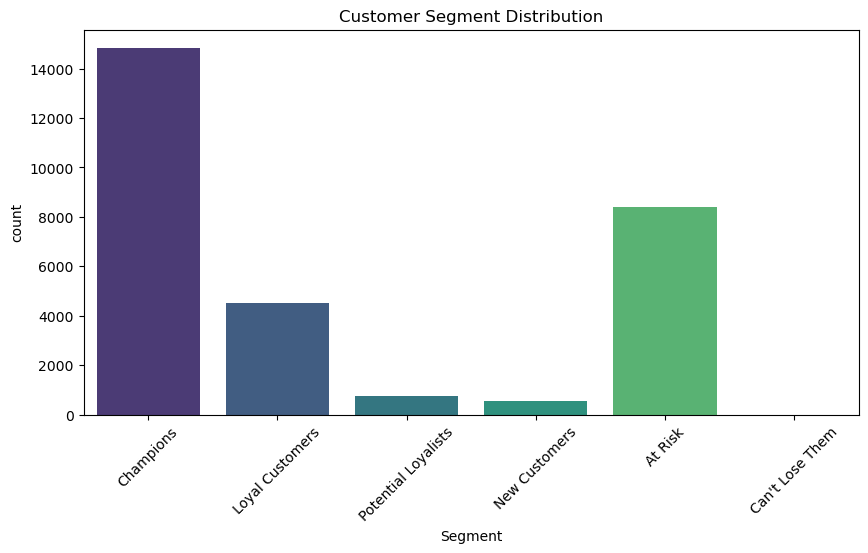

In [32]:
my_order = ['Champions', 'Loyal Customers', 'Potential Loyalists', 'New Customers', 'At Risk', "Can't Lose Them"]
filtered_rfm = rfm[rfm['Segment'].isin(my_order)]
plt.figure(figsize=(10, 5))
sns.countplot(data=filtered_rfm,x='Segment', palette='viridis', order=my_order)
plt.title('Customer Segment Distribution')
plt.xticks(rotation=45)
plt.show()


In [33]:
#Product And Promotion Analysis 
product_perf=df.groupby('product_id').agg(
                                    unit_solds=('quantity','sum'),
                                    total_revenue=('revenue','sum'),
                                    avg_discount=('promo_amount','mean')
                                    ).sort_values("total_revenue", ascending=False)
    
    

In [34]:
df.groupby('masterCategory')['revenue'].sum().sort_values(ascending=False)

masterCategory
Apparel           151634859875
Accessories        79854298979
Footwear           65437680315
Personal Care      17068271322
Free Items           703080084
Sporting Goods       171701130
Home                   4514611
Name: revenue, dtype: int64

In [35]:
promo_effect=(df.groupby('promo_code').agg(
                                            usage_count=('booking_id','count'),
                                            total_revenue=('revenue', 'sum'),
                                            avg_revenue=('revenue','mean'),
                                            avg_discount=('promo_amount', 'mean'),
                                            conversion=('session_engaged','mean')
                                            ).sort_values(by='usage_count',ascending=False)
             )

In [36]:
promo_effect

,usage_count,total_revenue,avg_revenue,avg_discount,conversion
promo_code,,,,,
No promo code,526048,194360821109,369473.548248,0.000000,1.0
AZ2022,89227,33027445823,370150.804387,4987.354478,1.0
BUYMORE,66835,24656128145,368910.423356,4988.863395,1.0
WEEKENDSERU,61941,22814857609,368332.083902,4998.441743,1.0
XX2022,44744,16513470010,369065.573261,4986.958073,1.0
LIBURDONG,20965,7731295924,368771.568042,4990.043692,1.0
WEEKENDMANTAP,20448,7557970432,369619.054773,4989.359888,1.0
SC2022,11271,4220152960,374425.779434,9956.061840,1.0
STARTUP,11105,4168459996,375367.851959,9996.147771,1.0


In [37]:
#Revenue_trend
monthly_rev=(df.groupby('order_month')['revenue'].sum().reset_index())

In [38]:
monthly_rev['mom_growth']=monthly_rev['revenue'].pct_change()

In [39]:
from scipy.stats import ttest_ind,linregress

In [40]:
def promo_impact(trans):
    promo=trans[trans['promo_amount']!=0] ['revenue']
    no_promo=trans[trans['promo_amount']==0] ['revenue']
    t_stat,p_val=ttest_ind(promo,no_promo,equal_var=False)
    return {
        't_statistics':float(t_stat),
        'p_value':float(p_val),
        'promo_mean':float(promo.mean()),
        'no_promo_mean':float(no_promo.mean()),
        'Is significant':bool(p_val>0.05)
}
        
    
    

In [41]:
promo_impact(df)

{'t_statistics': 0.12594818254165038,
 'p_value': 0.8997729787608548,
 'promo_mean': 369606.35549832176,
 'no_promo_mean': 369473.5482484488,
 'Is significant': True}

In [42]:
click.head()

,session_id,event_name,event_time,event_id,traffic_source
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06 15:54:32.821085,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06 16:03:57.821085,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01 12:05:10.322763,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01 12:06:33.322763,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01 12:15:29.425431,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE


In [ ]:
'''# 1. Ensure time is datetime
click['event_time'] = pd.to_datetime(click['event_time'])

# 2. Extract date
click['event_date'] = click['event_time'].dt.date

# 3. Group by BOTH Session ID and Date
click_agg = (
    click.groupby(['session_id', 'event_date'])
    .agg(
        total_event=('event_id','count'),
        first_event_time=('event_time','min'),
        last_event_time=('event_time', 'max'),
        traffic_source=('traffic_source', 'first')
    )
    .reset_index()
)'''

In [46]:
merged_data=df.copy()

In [49]:
merged_data=merged_data.drop(columns=['created_at','sales'],axis=1)

In [50]:
merged_data.to_csv('data.csv',index=False)